In [33]:
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [202]:
cd T:\freely_moving_ephys\ephys_recordings\092820\J524RT\fm1

T:\freely_moving_ephys\ephys_recordings\092820\J524RT\fm1


In [201]:
ls

 Volume in drive T is 8tb internal A
 Volume Serial Number is 7481-8BF5

 Directory of T:\freely_moving_ephys\ephys_recordings\092820\J524RT

09/29/2020  04:13 PM    <DIR>          .
09/29/2020  04:13 PM    <DIR>          ..
09/28/2020  11:27 AM       157,548,544 092820_J524RT_checkerboard_hf_Ephys.bin
09/28/2020  11:27 AM           182,704 092820_J524RT_checkerboard_hf_Ephys_BonsaiTS.csv
09/28/2020  11:27 AM        27,531,418 092820_J524RT_checkerboard_hf_REYE.avi
09/28/2020  11:27 AM            45,410 092820_J524RT_checkerboard_hf_REYE_BonsaiTS.csv
09/28/2020  11:27 AM         9,806,568 092820_J524RT_checkerboard_hf_TOP1.avi
09/28/2020  11:27 AM            93,537 092820_J524RT_checkerboard_hf_TOP1_BonsaiTS.csv
09/28/2020  11:27 AM            88,614 092820_J524RT_checkerboard_hf_TOP1_FlirTS.csv
09/28/2020  11:26 AM                 0 092820_J524RT_checkerboard_hf_TOP2_BonsaiTS.csv
09/28/2020  11:26 AM                 0 092820_J524RT_checkerboard_hf_TOP2_FlirTS.csv
09/28/2020  11:26 AM 

In [203]:
framerate = 30000
allSpikeT = np.load('spike_times.npy')
allSpikeT = allSpikeT/framerate  # should be a lookup table with timestamps
duration = np.max(allSpikeT)
duration

1192.2076666666667

In [204]:
ephys_data = pd.read_csv('cluster_info.tsv',sep = '\t',index_col=0)
ephys_data


,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh
id,,,,,,,,,,
0,383.9,8.9,good,31.474401,0,1.0,9.410262,good,11219,0
1,315.4,39.3,mua,23.014782,0,1.0,4.292032,noise,5117,0
2,427.5,6.7,good,33.772884,0,1.0,4.480758,good,5342,0
3,212.9,0.3,good,14.963311,3,4.0,52.519312,noise,62614,0
4,419.4,7688.6,mua,14.540514,5,6.0,0.119945,noise,143,0
...,...,...,...,...,...,...,...,...,...,...
60,227.9,41.4,mua,15.748152,14,15.0,1.347079,noise,1606,0
61,407.9,433.3,mua,24.803701,12,13.0,0.102331,noise,122,0
62,444.9,64.6,mua,28.681179,15,16.0,1.807569,noise,2155,0


In [205]:
clust = np.load('spike_clusters.npy')
clust

array([ 0,  3, 41, ...,  3, 27, 27])

In [206]:
ephys_data['spikeT'] = nan
ephys_data['spikeT'] = ephys_data['spikeT'].astype(object)
ephys_data.dtypes

Amplitude    float64
ContamPct    float64
KSLabel       object
amp          float64
ch             int64
depth        float64
fr           float64
group         object
n_spikes       int64
sh             int64
spikeT        object
dtype: object

In [207]:
# get spiketimes for each cluster
for c in np.unique(clust):
    c
    ephys_data.at[c,'spikeT'] =allSpikeT[clust==c].flatten()



In [208]:
# get waveform templates
templates = np.load('templates.npy')
templates.shape
ephys_data['waveform'] = nan
ephys_data['waveform'] = ephys_data['spikeT'].astype(object)
for i, ind in enumerate(ephys_data.index):
    ephys_data.at[ind,'waveform']= templates[ind,21:,ephys_data.at[ind,'ch']]

In [220]:
goodcells = ephys_data.loc[ephys_data['group']=='good']
goodcells


,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,spikeT,waveform
id,,,,,,,,,,,,
0,383.9,8.9,good,31.474401,0,1.0,9.410262,good,11219,0,"[0.0052, 0.1723, 0.3153666666666667, 0.3792, 0...","[-0.0043589817, -0.005534245, -0.006801264, -0..."
2,427.5,6.7,good,33.772884,0,1.0,4.480758,good,5342,0,"[0.2502333333333333, 0.3950666666666667, 0.400...","[7.201318e-05, -0.014391127, -0.010996173, -0...."
5,900.6,7.7,good,37.470116,4,5.0,0.900010,good,1073,0,"[0.47253333333333336, 1.4617, 1.4748, 1.49, 1....","[0.0023106122, 0.005993641, 0.00474555, 0.0035..."
13,615.3,46.4,mua,39.998573,5,6.0,0.936916,good,1117,0,"[2.1380666666666666, 3.807533333333333, 4.0626...","[0.015905505, 0.01845782, 0.012999079, 0.01265..."
22,707.6,9.0,good,69.099602,7,8.0,7.791419,good,9289,0,"[0.1991, 0.28746666666666665, 0.32476666666666...","[0.013564532, 0.012236126, 0.010539431, 0.0141..."
23,1157.2,0.4,good,69.374580,7,8.0,33.361598,good,39774,0,"[0.17466666666666666, 0.189, 0.559533333333333...","[-0.0042780917, -0.002905198, -0.0022638799, -..."
27,2320.8,2.6,good,89.712242,8,9.0,20.642353,good,24610,0,"[0.0619, 0.11183333333333334, 0.12313333333333...","[0.028593952, 0.00883107, 0.011988317, 0.01016..."
31,946.6,6.7,good,73.780571,8,9.0,4.254287,good,5072,0,"[1.7500666666666667, 2.2780666666666667, 4.697...","[0.023237778, 0.025709478, 0.024878792, 0.0255..."
35,975.2,4.6,good,60.720009,8,9.0,13.105923,good,15625,0,"[0.039, 0.1157, 0.18506666666666666, 0.2453, 0...","[-0.0037945388, -0.0011765561, -0.003106528, -..."


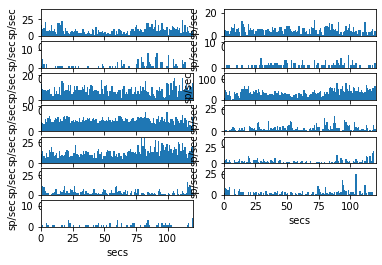

In [211]:
# plot spike firing rate
for i,ind in enumerate(goodcells.index):
   plt.subplot(7,2,i+1) 
   plt.hist(goodcells.at[ind,'spikeT'],bins = np.arange(0,np.max(allSpikeT),1))
   plt.xlim(0, 120); plt.xlabel('secs'); plt.ylabel('sp/sec')

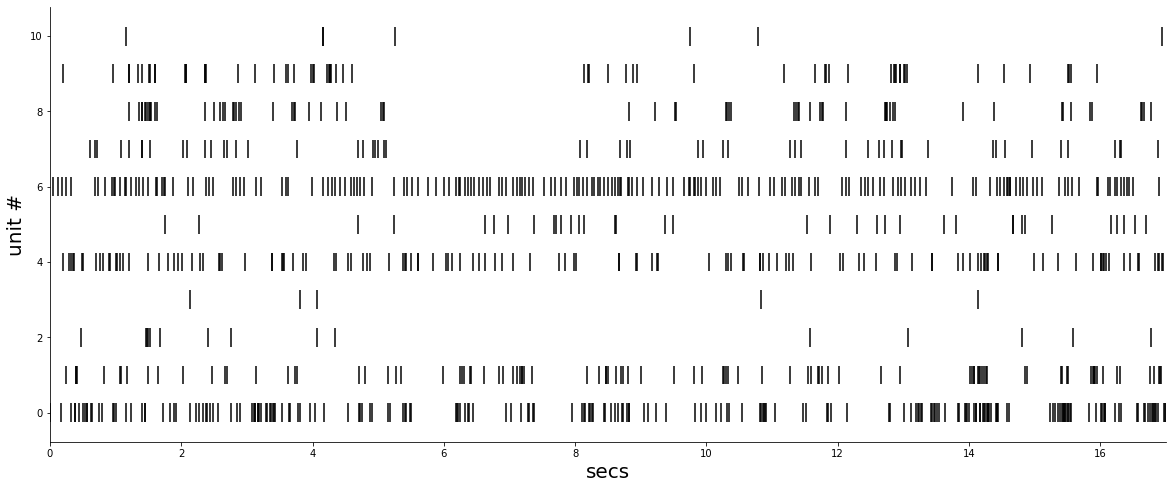

In [237]:
#spike rasters
fig, ax = plt.subplots(figsize=(20,8))
ax.fontsize = 20
for i,ind in enumerate(goodcells[goodcells['fr']<20].index):
   plt.vlines(goodcells.at[ind,'spikeT'],i-0.25, i+0.25)
   plt.xlim(0, 17); plt.xlabel('secs',fontsize = 20); plt.ylabel('unit #',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('spikeraster.pdf')

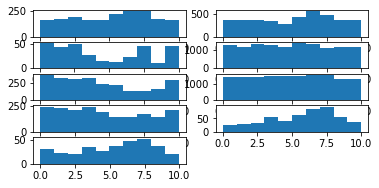

In [145]:
# cycle average firing rate
ncyc = duration/10
for i,ind in enumerate(goodcells.index):
   plt.subplot(7,2,i+1) 
   plt.hist(goodcells.at[ind,'spikeT']%10,bins = 10) # should be normalized by ncyc, so get data from hist and divide by ncyc before plotting
   plt.xlabel('secs')

ValueError: num must be 1 <= num <= 10, not 11

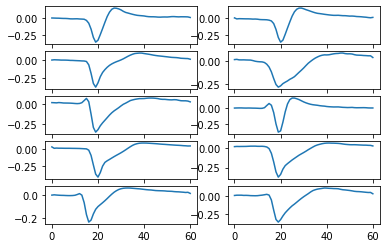

In [213]:
# plot waveforms
for i,ind in enumerate(goodcells.index):
   plt.subplot(5,2,i+1) 
   plt.plot(goodcells.at[ind,'waveform'])

In [218]:
goodcells.at[1]

TypeError: _get_value() missing 1 required positional argument: 'col'

In [188]:
ephys_data.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35,
            36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
            54, 55, 56, 57, 58, 59, 60, 61],
           dtype='int64', name='id')